<a href="https://colab.research.google.com/github/Medouchene/Deep-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn import svm

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [ ]:
# Convertir en DataFrame pour utiliser describe()
df = pd.DataFrame(X, columns=iris.feature_names)

# Afficher la description statistique des données
print(df.head())

print(df.describe())
print("X is a matrix of : ", len(X), " rows and ", len(X[0]), " columns ")

print("y is a vector of ", len(y))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

In [ ]:
X = X[y != 0, :2]
y = y[y != 0]
print("X is a matrix of : ", len(X), " rows and ", len(X[0]), " columns ")

X is a matrix of :  100  rows and  2  columns 


In [ ]:
#X_moitie = X[:len(X)//2,]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# SVM lineaire
svm_linear = svm.SVC(kernel='linear', max_iter = 10000)
svm_linear.fit(X_train, y_train)
#q5
# valuer de la precision sur l'ensemble de test
score_linear = svm_linear.score(X_test, y_test)
print(f"Precision du SVM lineaire : {score_linear}")

Precision du SVM lineaire : 0.7


In [ ]:
# SVM avec un noyau polynomial
svm_poly = svm.SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

# valuer la precision sur l'ensemble de test
score_poly = svm_poly.score(X_test, y_test)
print(f"Precision du SVM polynomial : {score_poly}")

Precision du SVM polynomial : 0.78


In [ ]:
# Exemple avec un SVM linÃ©aire et diffÃ©rents paramÃ¨tres de C
svm_linear_C = svm.SVC(kernel='linear', C=0.1)
svm_linear_C.fit(X_train, y_train)
score_linear_C = svm_linear_C.score(X_test, y_test)
print(f"PrÃ©cision du SVM linÃ©aire avec C=0.1 : {score_linear_C}")

# Exemple avec un SVM polynomial et diffÃ©rents degrÃ©s
svm_poly_C = svm.SVC(kernel='poly', degree=3, C=0.1)
svm_poly_C.fit(X_train, y_train)
score_poly_C = svm_poly_C.score(X_test, y_test)
print(f"PrÃ©cision du SVM polynomial avec C=0.1 : {score_poly_C}")

PrÃ©cision du SVM linÃ©aire avec C=0.1 : 0.4
PrÃ©cision du SVM polynomial avec C=0.1 : 0.72


In [ ]:
# Validation croisÃ©e pour le SVM linÃ©aire
scores_linear = cross_val_score(svm.SVC(kernel='linear'), X, y, cv=5)
print(f"Scores du SVM linÃ©aire avec validation croisÃ©e : {scores_linear}")
print(f"Moyenne des scores : {scores_linear.mean()}")

# Validation croisÃ©e pour le SVM polynomial
scores_poly = cross_val_score(svm.SVC(kernel='poly', degree=3), X, y, cv=5)
print(f"Scores du SVM polynomial avec validation croisÃ©e : {scores_poly}")
print(f"Moyenne des scores : {scores_poly.mean()}")

Scores du SVM linÃ©aire avec validation croisÃ©e : [0.6  0.75 0.65 0.8  0.8 ]
Moyenne des scores : 0.72
Scores du SVM polynomial avec validation croisÃ©e : [0.6  0.75 0.6  0.8  0.8 ]
Moyenne des scores : 0.71


Exercice 2

In [ ]:
raisin = pd.read_excel("/content/drive/MyDrive/M2/ML/Supervised/PREP/TP3/Raisin.xlsx")
print(raisin.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [ ]:
raisin["Class"].replace({"Kecimen":0,"Besni":1},inplace=True)
raisin["Class"]

<ipython-input-55-4d004d65fcbe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raisin["Class"].replace({"Kecimen":0,"Besni":1},inplace=True)
<ipython-input-55-4d004d65fcbe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raisin["Class"].replace({"Kecimen":0,"Besni":1},inplace=True)


,Class
0,0
1,0
2,0
3,0
4,0
...,...
895,1
896,1
897,1
898,1


In [ ]:
sum(raisin["Class"]==0)/len(raisin["Class"])


0.5

In [ ]:
sum(raisin["Class"]==1)/len(raisin["Class"])

0.5

In [ ]:
X = raisin.drop('Class',axis=1)

y = raisin['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, shuffle=True,random_state = 42)

In [ ]:
sum(y_test==0)/len(y_test)

0.5166666666666667

In [ ]:
sum(y_test==1)/len(y_test)

0.48333333333333334

In [ ]:
sum(y_train==0)/len(y_train)

0.49166666666666664

In [ ]:
sum(y_train==1)/len(y_train)

0.5083333333333333

In [ ]:
C = [0.1, 1, 5, 10, 50, 100]

linear_scores =[]

for i in C:

  clf_linear = LinearSVC(C=i, max_iter=100000)
  clf_linear.fit(X_train, y_train)

  pred_clf_linear = clf_linear.predict(X_test)

  cross_linear = cross_val_score(clf_linear, X_train, y_train, cv=5)

  linear_scores.append(np.mean(cross_linear))


linear_scores

[0.8616666666666667,
 0.8616666666666667,
 0.8616666666666667,
 0.8616666666666667,
 0.8616666666666667,
 0.8616666666666667]

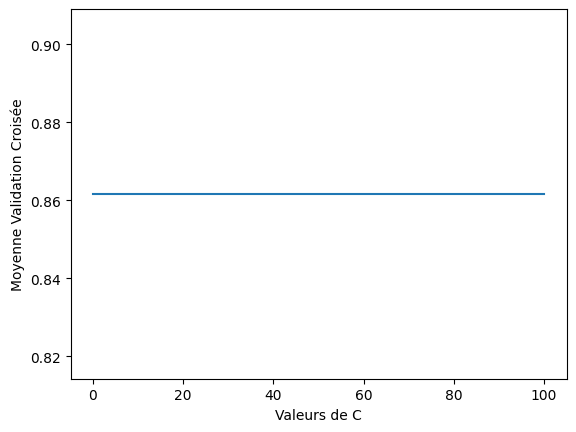

In [ ]:
plt.plot(C,linear_scores)

plt.xlabel("Valeurs de C")
plt.ylabel("Moyenne Validation Croisée")

plt.show()

In [ ]:
clf_linear_best = LinearSVC(C=0.1)
clf_linear_best.fit(X_train, y_train)

pred_clf_linear_best = clf_linear_best.predict(X_test)

pred_clf_linear_best

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
accuracy_score(y_test,pred_clf_linear_best)


0.85

In [ ]:
confusion_matrix(y_test,pred_clf_linear_best)#a matrice de confusion.

array([[131,  24],
       [ 21, 124]])

Q6

In [ ]:
from sklearn.preprocessing import StandardScaler

degrees = [1,2,3,4]
# Normaliser les données d'apprentissage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Applique la normalisation sur X_train

svc_scores = []

for i in degrees:

  clf_poly = svm.SVC(C=0.1, kernel='poly', degree=i, gamma=2, max_iter=100000)
  clf_poly.fit(X_train_scaled, y_train)

  cross_poly = cross_val_score(clf_poly, X_train_scaled, y_train, cv=5)
  svc_scores.append(np.mean(cross_poly))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).